In [2]:
import pandas as pd
import numpy as np
import os
import time
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load credit card dataset

filename = os.path.join(os.path.dirname(__name__), "../data/creditcard.csv")
creditcard_data = pd.read_csv(filename, delimiter=',', low_memory=False)
print(creditcard_data.info())
creditcard_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Feature Understanding

In [4]:
# Check and handle any NULL values

creditcard_data.isnull().sum().any()

np.False_

In [5]:
# Check and handle any data imbalance
# Segregate features and labels
X = creditcard_data.drop('Class', axis=1)
y = creditcard_data['Class']

# Shape of the features and labels
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Print the distribution of target classes
print("Class distribution:\n", y.value_counts())


Features shape: (284807, 30)
Labels shape: (284807,)
Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# Visualize the class distribution imbalance

# Count values of each class
class_counts = y.value_counts()

# Plot bar chart
plt.figure()
class_counts.plot(kind='bar', logy=True)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [10]:
# Data Standardization

X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [ ]:
# Check if features are standardized
# Check feature distributions using box plots

plt.figure(figsize=(10, 6))
X.boxplot()
plt.plot()

### Observations:
* There is no need to handle missing values as there are no NULL values in dataset.
* Imbalance in the dataset is found which needs to be handle. - **SMOTE** will be used later to correct the imabalance.
* The features needs to be standardized as per distribution.

## Pre-Processing

In [ ]:
# train-test split of the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Use SMOTE to correct imbalance
from imblearn.over_sampling import SMOTE

smote_dataset = SMOTE(sampling_strategy='all', random_state=42)
X_resampled, y_resampled = smote_dataset.fit_resample(X, y)

# Print the new distribution of target classes
print("Resampled class distribution:\n", y_resampled.value_counts())

Resampled class distribution:
 Class
0    284315
1    284315
Name: count, dtype: int64


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 284807 samples in 0.047s...
[t-SNE] Computed neighbors for 284807 samples in 1037.526s...
[t-SNE] Computed conditional probabilities for sample 1000 / 284807
[t-SNE] Computed conditional probabilities for sample 2000 / 284807
[t-SNE] Computed conditional probabilities for sample 3000 / 284807
[t-SNE] Computed conditional probabilities for sample 4000 / 284807
[t-SNE] Computed conditional probabilities for sample 5000 / 284807
[t-SNE] Computed conditional probabilities for sample 6000 / 284807
[t-SNE] Computed conditional probabilities for sample 7000 / 284807
[t-SNE] Computed conditional probabilities for sample 8000 / 284807
[t-SNE] Computed conditional probabilities for sample 9000 / 284807
[t-SNE] Computed conditional probabilities for sample 10000 / 284807
[t-SNE] Computed conditional probabilities for sample 11000 / 284807
[t-SNE] Computed conditional probabilities for sample 12000 / 284807
[t-SNE] Computed conditional prob

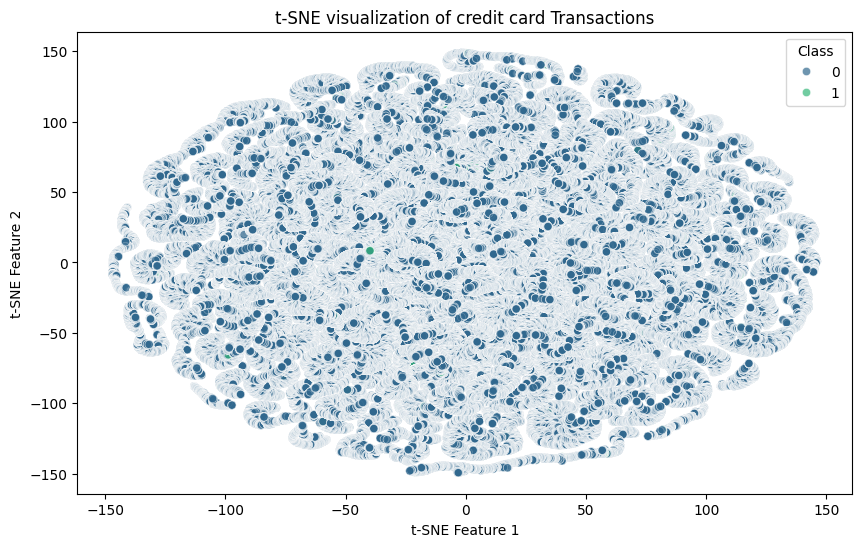

In [ ]:
# Visualisation of data before and after correcting imbalance using t-SNE

tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, verbose=1, n_jobs=-1)
x_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10,6))
sns.scatterplot(x=x_tsne[:,0],y=x_tsne[:,1], hue=y, palette='viridis', alpha =0.7)
plt.title('t-SNE visualization of credit card Transactions')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(title='Class', loc='best')
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 568630 samples in 0.065s...
[t-SNE] Computed neighbors for 568630 samples in 2224.018s...
[t-SNE] Computed conditional probabilities for sample 1000 / 568630
[t-SNE] Computed conditional probabilities for sample 2000 / 568630
[t-SNE] Computed conditional probabilities for sample 3000 / 568630
[t-SNE] Computed conditional probabilities for sample 4000 / 568630
[t-SNE] Computed conditional probabilities for sample 5000 / 568630
[t-SNE] Computed conditional probabilities for sample 6000 / 568630
[t-SNE] Computed conditional probabilities for sample 7000 / 568630
[t-SNE] Computed conditional probabilities for sample 8000 / 568630
[t-SNE] Computed conditional probabilities for sample 9000 / 568630
[t-SNE] Computed conditional probabilities for sample 10000 / 568630
[t-SNE] Computed conditional probabilities for sample 11000 / 568630
[t-SNE] Computed conditional probabilities for sample 12000 / 568630
[t-SNE] Computed conditional prob

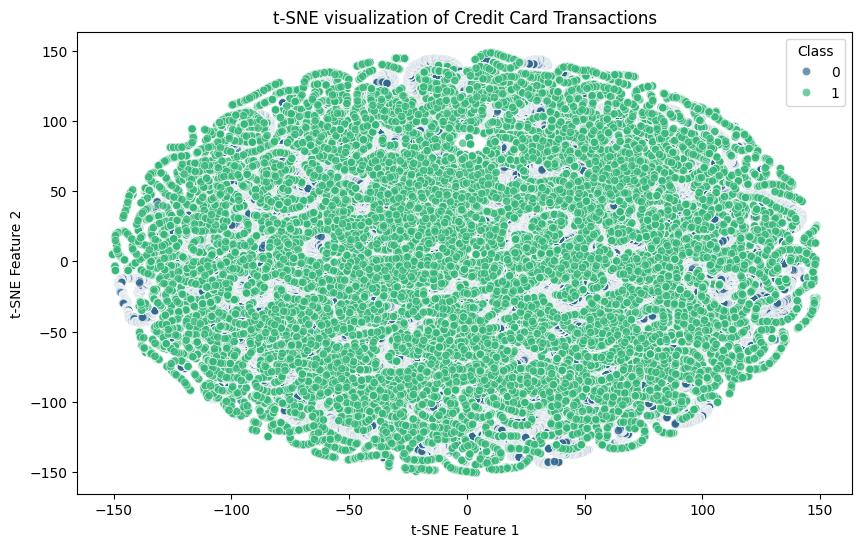

In [ ]:


tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=42, verbose=1, n_jobs=-1)
X_tsne = tsne.fit_transform(X_resampled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_resampled, palette='viridis', alpha=0.5)
plt.title('t-SNE visualization of Credit Card Transactions')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(title='Class', loc='best')
plt.show()

[]

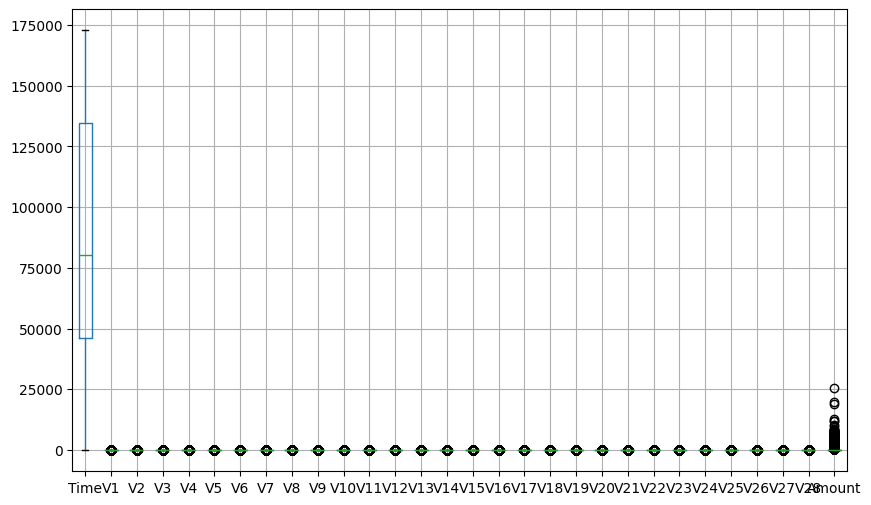

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_transformed = scaler.fit_transform(X_resampled)
y_transformed = scaler.fit_transform(y_resampled.values.reshape(-1, 1))